In [1]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import random
import numpy as np
import csv
from collections import Counter

In [28]:
#File_Paths
CTU_NETFLOW_FILEPATH = "./capture20110812.pcap.netflow.labeled"
COLUMNS = ["Date flow start","Durat","Prot","Src IP Addr","Dst IP Addr","Flags","Tos","Packets Bytes","Flows","Label","Labels"]
HOSTS = ["147.32.84.165","147.32.84.170","147.32.84.134","147.32.84.164","147.32.87.36","147.32.80.9","147.32.87.11"]
fieldnames= ["Date flow start","Durat","Prot","Src IP Addr","Dst IP Addr","Flags","Tos","Packets"," Bytes","Flows","Label"]

In [29]:
class MinCount:
    
    def __init__(self,reservoirSize,debug_mode):
        self.debug = debug_mode
        self.reservoir_size = reservoirSize
        self.rns = []
        self.elements = [] 
    
    def try_add_candidate(self,candidate):
        if(self.debug):
            print("\n")
            print("Adding ",candidate)
        random_number = random.random()
        if(self.debug):
            print("Random Number: ",random_number)
        
        #if reservoir size < than reservoir max size always add
        if (len(self.elements) < self.reservoir_size):
            if(self.debug):
                print("Still have Space")
                print("CANDIDATE ADDED")
            self.rns.append(random_number)
            self.elements.append(candidate)
            return
        
        #else replace element with biggest rn
        else:
            if(self.debug):
                print("Try Substitute")
                print("Max randomnumber: ",max(self.rns)," in index ",self.rns.index(max(self.rns)))
            #if random number bigger than bigger random number dont add
            if random_number > max(self.rns):
                if(self.debug):
                    print("Random Number Higher than Max value in random numbers list")
                    print("CANDIDATE NOT ADDED")
                return
            if(self.debug):
                print("Random Number Lower than Max value in random numbers list")
                print("Added ",candidate," with rn: ",random_number)
                print("CANDIDATE ADDED WITH REPLACE")
            highest_rn_index = self.rns.index(max(self.rns))
            self.rns[highest_rn_index] = random_number
            self.elements[highest_rn_index] = candidate
            return
            
    def get_elements(self):
        return self.elements
    def get_rns(self):
        return self.rns
    
    def get_rns_and_elements(self):
        return list(zip(self.rns, self.elements))

# Parse File

In [30]:
#Open File
amount_of_packets = 10000
packets =[]
trueCounter ={}
reservoir_sizes=[10000] #500 step from 500 to 10000
minCounters = []
#DO NOT TURN DEBUG MODE FOR ALL THE DATA
debug = False
#To limit the amount of packets uncomment the break condition in the end of the cell.
for rSize in reservoir_sizes:
    minCounters.append(MinCount(rSize,debug))
    
    
with open(CTU_NETFLOW_FILEPATH,"r") as netflow:
    #File is an Argus Unidirectional file created with ra -r so not rly csv. 
    #Let's parse by hand.
    for i,packet  in enumerate(netflow):
        #skip header
        if i == 0:
            continue
            
        packet = packet.rstrip('\n')
        split_packet = packet.split("\t")
        if i%100000==0:
            print("Packet ",i)
        
        if "->" in split_packet:
            split_packet.remove("->")
        if "" in split_packet:
            split_packet.remove("")
        #print(split_packet[3])
        if ":" in split_packet[3]: 
            split_packet[3]= split_packet[3].split(":")[0]
        #print(split_packet[4])
        elif ":" in split_packet[4]:
            split_packet[4]= split_packet[4].split(":")[0]
        #print(split_packet[3]," -> ",split_packet[4])
        
        split_packet = [e for e in split_packet if e]
        
        #minCounter.try_add_candidate(split_packet[3])#Source IP
        if split_packet[3] not in HOSTS:
            if split_packet[3] not in trueCounter:
                trueCounter[split_packet[3]]=0
            trueCounter[split_packet[3]]+=1 
            for minCounter in minCounters:
                minCounter.try_add_candidate(split_packet[3])#Source IP
        
        
        #elif split_packet[4] not in HOSTS:
        #    minCounter.try_add_candidate(split_packet[4])
        #else:
            #print(split_packet[4]," is host")
        #print(split_packet)
        #packets.append(split_packet)
        
        """if i == amount_of_packets:
            break"""
        

Packet  100000
Packet  200000
Packet  300000
Packet  400000
Packet  500000
Packet  600000
Packet  700000
Packet  800000
Packet  900000
Packet  1000000
Packet  1100000
Packet  1200000
Packet  1300000
Packet  1400000
Packet  1500000
Packet  1600000
Packet  1700000
Packet  1800000
Packet  1900000
Packet  2000000
Packet  2100000
Packet  2200000
Packet  2300000
Packet  2400000
Packet  2500000
Packet  2600000
Packet  2700000
Packet  2800000
Packet  2900000
Packet  3000000
Packet  3100000
Packet  3200000
Packet  3300000
Packet  3400000
Packet  3500000
Packet  3600000
Packet  3700000
Packet  3800000
Packet  3900000
Packet  4000000
Packet  4100000
Packet  4200000
Packet  4300000
Packet  4400000
Packet  4500000
Packet  4600000
Packet  4700000
Packet  4800000
Packet  4900000
Packet  5000000
Packet  5100000
Packet  5200000
Packet  5300000
Packet  5400000
Packet  5500000
Packet  5600000
Packet  5700000
Packet  5800000
Packet  5900000
Packet  6000000
Packet  6100000
Packet  6200000
Packet  6300000
P

In [31]:
minCounterValues = Counter(minCounters[0].get_elements()).most_common()[:10]
minCounterValues

[('147.32.84.229', 1523),
 ('147.32.84.138', 556),
 ('147.32.86.20', 487),
 ('147.32.85.25', 370),
 ('147.32.84.59', 332),
 ('147.32.85.34', 225),
 ('147.32.85.100', 170),
 ('147.32.84.171', 162),
 ('147.32.80.13', 126),
 ('147.32.87.1', 84)]

In [32]:
trueValues = Counter(trueCounter).most_common()[:10]
trueValues

[('147.32.84.229', 1942678),
 ('147.32.84.138', 718052),
 ('147.32.86.20', 598315),
 ('147.32.85.25', 481231),
 ('147.32.84.59', 428722),
 ('147.32.85.34', 291021),
 ('147.32.85.100', 212291),
 ('147.32.84.171', 200624),
 ('147.32.80.13', 141102),
 ('147.32.87.1', 107855)]

In [33]:
def get_dist_values(counter):
    result = []
    count =sum([x[1] for x in counter])
    for entry in counter:
        distEntry = (entry[0],float(entry[1])/float(count))
        result.append(distEntry)
    return result

In [34]:
minCountDist = get_dist_values(minCounterValues)

In [35]:
trueCountDist = get_dist_values(trueValues)

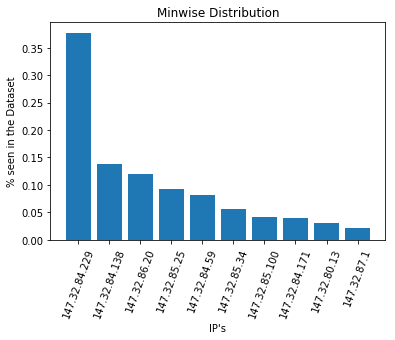

In [36]:
plt.bar(range(len(minCountDist)), [val[1] for val in minCountDist], align='center')
plt.xticks(range(len(minCountDist)), [val[0] for val in minCountDist])
plt.xticks(rotation=70)
plt.xlabel("IP's")
plt.ylabel("% seen in the Dataset")
plt.title("Minwise Distribution")
plt.show()

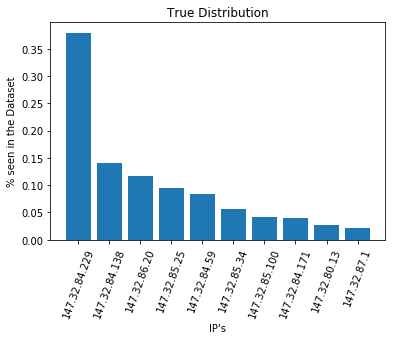

In [37]:
plt.bar(range(len(trueCountDist)), [val[1] for val in trueCountDist], align='center')
plt.xticks(range(len(trueCountDist)), [val[0] for val in trueCountDist])
plt.xticks(rotation=70)
plt.xlabel("IP's")
plt.ylabel("% seen in the Dataset")
plt.title("True Distribution")
plt.show()

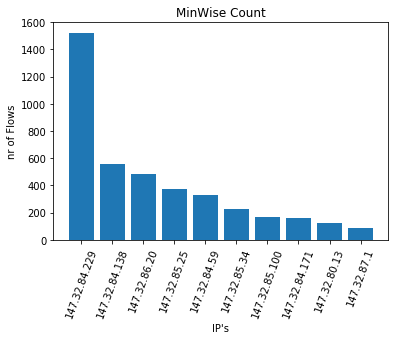

In [38]:
plt.bar(range(len(minCounterValues)), [val[1] for val in minCounterValues], align='center')
plt.xticks(range(len(minCounterValues)), [val[0] for val in minCounterValues])
plt.xticks(rotation=70)
plt.xlabel("IP's")
plt.ylabel("nr of Flows")
plt.title("MinWise Count")
plt.show()

## In case you want to try out the different minCounters  (Otherwise Skip to next title)

In [10]:
# Precomputed values for k = 100,1000,10000
with open("counters_min_wise_sampling.pkl","rb") as counter_file_min_wise:
    unpickler = pkl.Unpickler(counter_file_min_wise)
    minCounters = unpickler.load()

In [11]:
for minCounter in minCounters:
    print(Counter(minCounter.get_elements()).most_common()[:10])
    print("\n")

[('147.32.84.229', 11), ('147.32.86.20', 6), ('147.32.85.25', 6), ('147.32.84.138', 4), ('67.195.115.95', 3), ('147.32.86.190', 3), ('147.32.85.34', 3), ('147.32.87.20', 2), ('147.32.87.1', 2), ('147.32.85.74', 2)]


[('147.32.84.229', 164), ('147.32.84.138', 62), ('147.32.86.20', 46), ('147.32.85.25', 37), ('147.32.84.59', 35), ('147.32.85.34', 24), ('147.32.85.100', 17), ('147.32.84.171', 12), ('147.32.86.96', 12), ('147.32.85.56', 10)]


[('147.32.84.229', 1531), ('147.32.84.138', 585), ('147.32.86.20', 484), ('147.32.85.25', 358), ('147.32.84.59', 337), ('147.32.85.34', 228), ('147.32.85.100', 183), ('147.32.84.171', 142), ('147.32.80.13', 116), ('147.32.86.190', 85)]




In [13]:
#Show wi minCounter with k =10000
minCounter = minCounters[2]

In [ ]:
Counter(minCounter.get_rns_and_elements()

In [ ]:
counter = Counter(minCounter.get_elements())

print(len(counter))
print(counter.most_common()[:10])

In [ ]:
with open("counter_min_wise_sampling.pkl","wb") as counter_file_min_wise:
    pkl.dump(counter,counter_file_min_wise)

In [ ]:
with open("counter_min_wise_sampling.pkl","rb") as counter_file_min_wise:
    counter = pkl.load(counter_file_min_wise)

In [ ]:
counter.most_common()[:10]

In [ ]:
counter.most_common()